In [85]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [86]:

csv_file_path = 'C:/Users/ETTORE/Documents/Iron Hack/week 4/marketing_customer_analysis_clean.csv'

mkt_df = pd.read_csv(csv_file_path)

In [87]:
mkt_df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [88]:
#One Hot/Label Encoding of the categorical variables in the categoricals data frame 
#that you created in Activity 3. ( Hint: check Dropfirst option).

In [89]:
categoricals_df = mkt_df.select_dtypes(include='object')
categoricals_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [90]:
categoricals_df.renew_offer_type.unique()

array(['Offer3', 'Offer4', 'Offer2', 'Offer1'], dtype=object)

In [91]:
categoricals_columns_list = categoricals_df.columns.tolist()
print(categoricals_columns_list)

['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


In [92]:
# ordinal education,  renew_offer_type, 
# nominal 

In [93]:
nominals_df = pd.get_dummies(categoricals_df[['state', 'response', 'coverage', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']], dtype=int)
nominals_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_A
0,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
10906,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
10908,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1


In [94]:
categoricals_df.renew_offer_type.unique()


array(['Offer3', 'Offer4', 'Offer2', 'Offer1'], dtype=object)

In [95]:
categoricals_df.education.unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [96]:
categorical_df_education = categoricals_df["education"].map({"College":1,"Bachelor":2, "High School or Below":0,"Doctor":4,"Master":3})


In [97]:
categorical_df_renew = categoricals_df["renew_offer_type"].map({"Offer1":1,"Offer2":2, "Offer3":3,"Offer4":4})

In [98]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
categoricals_df_encoded = encoder.fit_transform(categoricals_df)


In [99]:
pd.concat([nominals_df, categorical_df_renew, categorical_df_education])

,0,coverage_Basic,coverage_Extended,coverage_Premium,effective_to_date_2011-01-01,effective_to_date_2011-01-02,effective_to_date_2011-01-03,effective_to_date_2011-01-04,effective_to_date_2011-01-05,effective_to_date_2011-01-06,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_A
0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10906,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10907,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10908,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
numericals_df = mkt_df.select_dtypes(include='number')
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


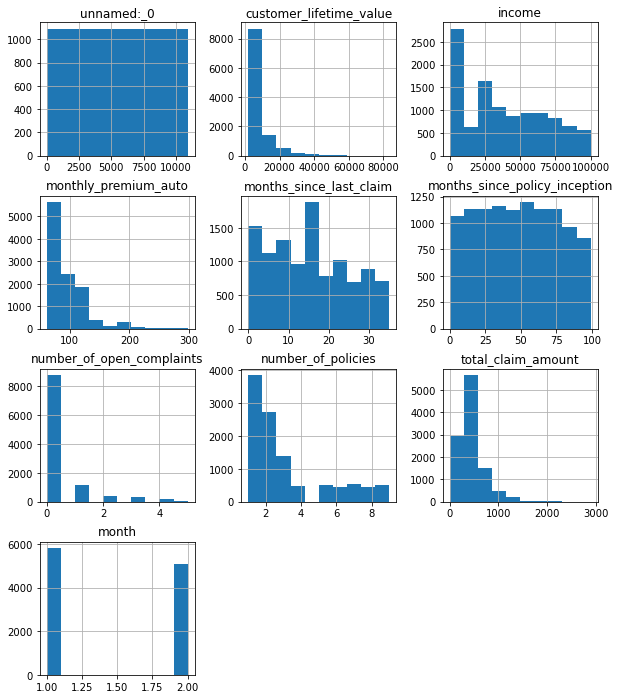

In [122]:
numericals_df.hist(figsize=(10,12), bins=10)
plt.show()

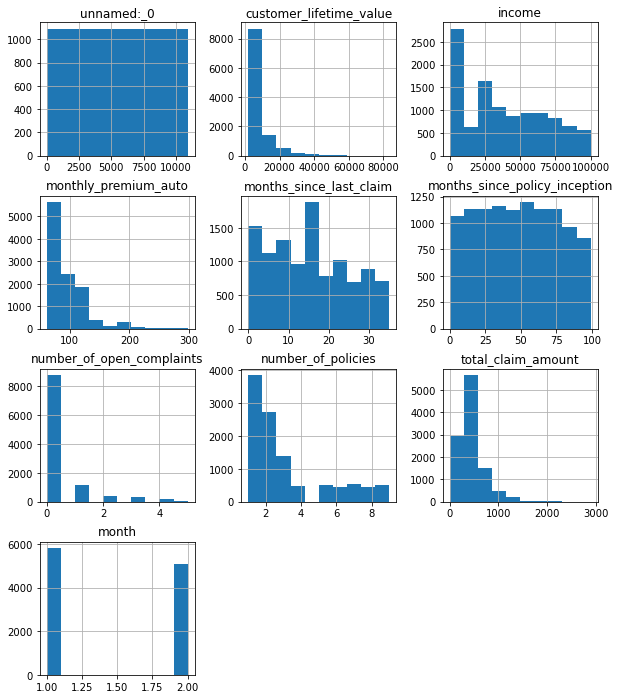

In [163]:
numericals_df.hist(figsize=(10,12), bins=10)
plt.show()

In [172]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


csv_file_path = 'C:/Users/ETTORE/Documents/Iron Hack/week 4/marketing_customer_analysis_clean.csv'

mkt_df = pd.read_csv(csv_file_path)


from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [173]:
#Exercise 2.1 varA Use minmax transform to bring varA's values into the range [0,1].
#Check that varA has been rescaled using a displot or a histogram varB

In [174]:
scaler = MinMaxScaler()
mkt_df["income_scaled"] = scaler.fit_transform(mkt_df[["income"]])


In [175]:
print(mkt_df[["income", "income_scaled"]].head())

   income  income_scaled
0   48029       0.480381
1       0       0.000000
2   22139       0.221432
3   49078       0.490873
4   23675       0.236795


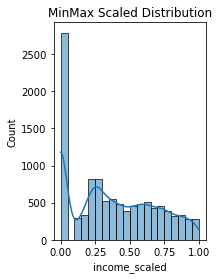

In [176]:
plt.subplot(1, 2, 2)
sns.histplot(mkt_df['income_scaled'], bins=20, kde=True)
plt.title('MinMax Scaled Distribution')

plt.show()

In [198]:
#Exercise 2.Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
#Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

from sklearn.preprocessing import StandardScaler,PowerTransformer
import pandas as pd

# Create a StandardScaler instance
scaler = StandardScaler()

scaler.fit_transform(mkt_df[["customer_lifetime_value"]])


array([[-0.46610505],
       [-0.84094593],
       [ 1.00652314],
       ...,
       [ 2.30582467],
       [ 0.5742732 ],
       [-0.16859268]])

In [200]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have a DataFrame named mkt_df
# Replace this with your actual DataFrame if needed

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the specified column using StandardScaler
mkt_df['customer_lifetime_value_standardized'] = scaler.fit_transform(mkt_df[['customer_lifetime_value']])

# Check mean and std after standardization
mean_after_standardization = mkt_df['customer_lifetime_value_standardized'].mean()
std_after_standardization = mkt_df['customer_lifetime_value_standardized'].std()

# Print mean and std
print(f"Mean after standardization: {mean_after_standardization}")
print(f"Standard Deviation after standardization: {std_after_standardization}")


Mean after standardization: 9.192412591379647e-17
Standard Deviation after standardization: 1.000045832664961


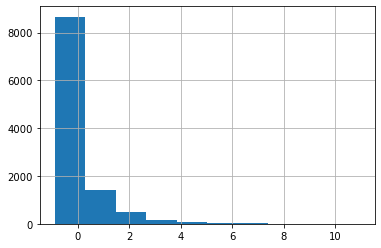

In [202]:
mkt_df.customer_lifetime_value_standardized.hist()

In [ ]:
mkt_df.customer_lifetime_value.hist()